# Daily News & Stock Market Correlation-Prediction (2/4)

**NOTE:** This is the _2nd part_ of the notebook. To see the _1st part_, click **[here.](https://databricks-prod-cloudfront.cloud.databricks.com/public/4027ec902e239c93eaaa8714f173bcfc/1993205155917960/4235175522479674/6079964132923530/latest.html)**

## Load Data

Firstly, we need to load the data from the previous notebook part:

In [0]:
# Load from DBFS
DBFS_DATA_DIR = f"/tmp/data/"

in_path = f"dbfs:{DBFS_DATA_DIR}/out/"

dfDjia = spark.read.parquet(f"{in_path}djia.parquet")
dfNews = spark.read.parquet(f"{in_path}news.parquet")
dfMl = spark.read.parquet(f"{in_path}ml.parquet")

In [0]:
# Install dependencies
!pip install nltk
!pip install wordcloud
!pip install vaderSentiment

  Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
  Using cached tqdm-4.64.1-py2.py3-none-any.whl (78 kB)
  Using cached regex-2022.10.31-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (769 kB)
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-db24cec7-2baa-4b9e-8bf7-633d77c7fe71/bin/python -m pip install --upgrade pip' command.
  Using cached wordcloud-1.8.2.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (458 kB)
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-db24cec7-2baa-4b9e-8bf7-633d77c7fe71/bin/python -m pip install --upgrade pip' command.
  Using cached vaderSentiment-3.3.2-py2.py3-none-any.whl (125 kB)
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-db24cec7-2baa-4b9e-8bf7-633d77c7fe71/bin/python -m pip install --upgrade pip' command.


## Analysis

### DJIA Analysis

Now that we've expanded the DJIA dataset with additional market/technical indicators, let's proceed to analyze the data. This may lead to conclusions which may be helpful as we try to fit a machine learning algorithm later on.

First, let's try to understand how DJIA generally performed in the given time period:

In [0]:
import pyspark.sql.functions as F
import pyspark.sql.types as T

period = "30 days"###C###

dfTemp = dfDjia.groupBy(F.window("Date", period).alias("Period")) \
    .agg(F.mean("Close").alias("Mean Close"),
        F.mean("Volume").alias("Mean Volume"),
        F.mean("OBV").alias("Mean OBV"),
        F.mean("Open").alias("Mean Open"),
        F.mean("SMA5").alias("Mean SMA5"),
        F.mean("SMA14").alias("Mean SMA14"),
        F.mean("SMA30").alias("Mean SMA30")) \
    .orderBy("Period")
dfTemp = dfTemp.withColumn("Period", dfTemp["Period"]["start"].cast(T.DateType()))
display(dfTemp)

Period,Mean Close,Mean Volume,Mean OBV,Mean Open,Mean SMA5,Mean SMA14,Mean SMA30
2008-07-10,11734.320312,2.1283E8,0.0,11432.089844,11734.320312,11734.320312,11734.320312
2008-08-09,11503.00041131579,1.6524263157894737E8,1.711878947368421E8,11527.27482531579,11548.19542736579,11583.484065804136,11595.281782949038
2008-09-08,10862.665971227272,3.285981818181818E8,5.890795454545455E8,10942.488236863635,10992.14469991818,11161.07588656169,11335.559901648068
2008-10-08,8945.576859954546,3.477636363636364E8,-2.47401E9,8978.202658954544,9018.460418227274,9353.855565503247,10082.635266513636
2008-11-07,8453.394457999999,3.384225E8,-2.9970415E9,8453.3459715,8508.37934079,8646.753597535713,8841.451061198333
2008-12-07,8679.911030052632,2.4204578947368422E8,-2.3431405263157897E9,8661.664268157894,8639.238106557897,8594.512816541355,8565.742794880704
2009-01-06,8281.343680190475,3.2223904761904764E8,-3.4611419047619047E9,8326.448591047621,8368.96957304762,8471.514980571428,8562.238653282539
2009-02-05,7415.909970238094,4.093133333333333E8,-5.240394761904762E9,7477.170038190477,7541.3128348190485,7777.975193962587,8058.990622642856
2009-03-07,7467.5500244999985,4.629855E8,-5.767477E9,7398.096533299999,7343.87062017,7190.449337339285,7344.893295079998
2009-04-06,8053.670549666667,3.612795238095238E8,-4.273387619047619E9,8033.954287619047,8011.965378552382,7927.362485816326,7654.531727515872


Output can only be rendered in Databricks

Output can only be rendered in Databricks

Output can only be rendered in Databricks

In [0]:
t = dfDjia.tail(1)[0]["Close"] - dfDjia.head(1)[0]["Close"]
print("Close change over time: %s$%dusd" % (("+" if t > 0 else "-"), int(t)))

Close change over time: +$6215usd


As we can see from the chart above, DJIA rose from $11.7k in July 2008 to $17.7k in June 2016. The market experienced a big crash in 2008 which is reflected in the data. However, DJIA generally performed well, as stock markets tend to provide gains in the long term.

For this reason, we have to be careful when evaluating our ML algorithm. Because our data is biased towards gains, our algorithm's results will probably be biased towards gains as well.

Let's visualize the biggest market gains and losses:

In [0]:
dfTemp = dfDjia.select("Date", "Change", "Volume") \
    .withColumn("Abs Change", F.abs(dfDjia["Change"])) \
    .withColumn("Gain", udf((lambda x: x > 0), T.BooleanType())(dfDjia["Change"]))
dfTemp.drop("Change")
display(dfTemp)###C###

Date,Change,Volume,Abs Change,Gain
2008-08-08,302.23046799999975,2.1283E8,302.23046799999975,true
2008-08-11,52.67968700000165,1.8319E8,52.67968700000165,true
2008-08-12,-139.23046799999975,1.7359E8,139.23046799999975,false
2008-08-13,-99.84960899999896,1.8255E8,99.84960899999896,false
2008-08-14,83.85937600000034,1.5979E8,83.85937600000034,true
2008-08-15,48.69042999999874,2.1504E8,48.69042999999874,true
2008-08-18,-180.2607429999989,1.5629E8,180.2607429999989,false
2008-08-19,-129.54003899999952,1.7158E8,129.54003899999952,false
2008-08-20,71.48925799999961,1.4488E8,71.48925799999961,true
2008-08-21,14.979492000000391,1.3002E8,14.979492000000391,true


Output can only be rendered in Databricks

As we can see, heavy losses are prominent in the 2008-2009 and 2011-2012 period.

Let's take a look at how volatile the price was comparing to the previous close:

In [0]:
from pyspark.sql.window import Window

period = "14 days"###C###

dfTemp = dfDjia.groupBy(F.window("Date", period).alias("Period")) \
    .agg(F.mean("Close").alias("Close")) \
    .orderBy("Period")
dfTemp = dfTemp.withColumn("% Change", (
    100 * (dfTemp["Close"] - F.lag("Close", 1).over(Window.partitionBy().orderBy("Period"))) / (
    F.lag("Close", 1).over(Window.partitionBy().orderBy("Period")
))))
dfTemp = dfTemp.withColumn("Positive", F.udf((lambda x: x <= 0 if x else False), T.BooleanType())(dfTemp["% Change"]))
dfTemp = dfTemp.withColumn("Period", dfTemp["Period"]["start"].cast(T.DateType()))
display(dfTemp)

Period,Close,% Change,Positive
2008-08-07,11579.255425444446,null,false
2008-08-21,11518.759874222224,-0.5224476790561884,true
2008-09-04,11186.1470703,-2.8875747698029244,true
2008-09-18,10931.553125,-2.2759753085668244,true
2008-10-02,9377.5831055,-14.215455038553825,true
2008-10-16,8795.1829591,-6.210557025705469,true
2008-10-30,9007.6839843,2.4161069324900573,false
2008-11-13,8327.6349121,-7.54965508764845,true
2008-11-27,8598.611111222222,3.2539394675971622,false
2008-12-11,8609.9541016,0.13191654130018574,false


Output can only be rendered in Databricks

### News Analysis

Let's try to find out a little more about which words pop up in our dataset. We'll firstly aggergate all words:

In [0]:
import matplotlib.pyplot as plt

# Collect all words (using collect() is not the most
# efficient, but this is for analysis purposes only)
word_freq = dict()
for arr in dfNews.select("Words").collect():
    for words in arr:
        for w in words:
            if not (w in word_freq):
                word_freq[w] = 0
            word_freq[w] += 1

In [0]:
import pandas as pd
words_pd = pd.DataFrame.from_dict(word_freq, orient="index", columns=['Frequency'])
words_pd.describe()

,Frequency
count,29902.000000
mean,26.689787
std,132.058867
min,1.000000
25%,1.000000
50%,2.000000
75%,7.000000
max,6187.000000


In [0]:
# 99% of words have this frequency or lower
perc = .99
t = words_pd.quantile(perc)
print(f"99% percentile frequency:      {float(t):0.2f}")
t = words_pd[words_pd.Frequency <= words_pd.Frequency.quantile(perc)].sum()
print(f"Total frequency of bottom {perc * 100:.0f}%: {float(t):.0f}")
print(f"Total frequency of top {(1 - perc) * 100:.0f}%:     {float(words_pd.sum() - t):.0f}")
print(f"Total fq. top {(1 - perc) * 100:.0f}% / bot. {perc * 100:.0f}%:   {float(1 - t / words_pd.sum()) * 100:.0f}%")
t = words_pd[words_pd.Frequency > words_pd.Frequency.quantile(perc)].count()
print(f"Top {(1 - perc) * 100:.0f}% count:                  {int(t)}")

99% percentile frequency:      507.00
Total frequency of bottom 99%: 490698
Total frequency of top 1%:     307380
Total fq. top 1% / bot. 99%:   39%
Top 1% count:                  299


Here we can see that the top 1% of the most frequent words account for almost 41% of all the words in the headlines. However, that's still almost 370 words&mdash;too many to analyze. Let's see the top 50 words.

In [0]:
import numpy as np

# Coloring function [3]
def get_colormap(cmap_name: str, vec: np.ndarray):
    """
    Easy coloring of matplotlib charts.
    """
    import matplotlib.pyplot as plt
    cmap = plt.get_cmap(cmap_name)
    rescale = lambda x: (x - np.min(x)) / (np.max(x) - np.min(x))
    return cmap(rescale(vec))

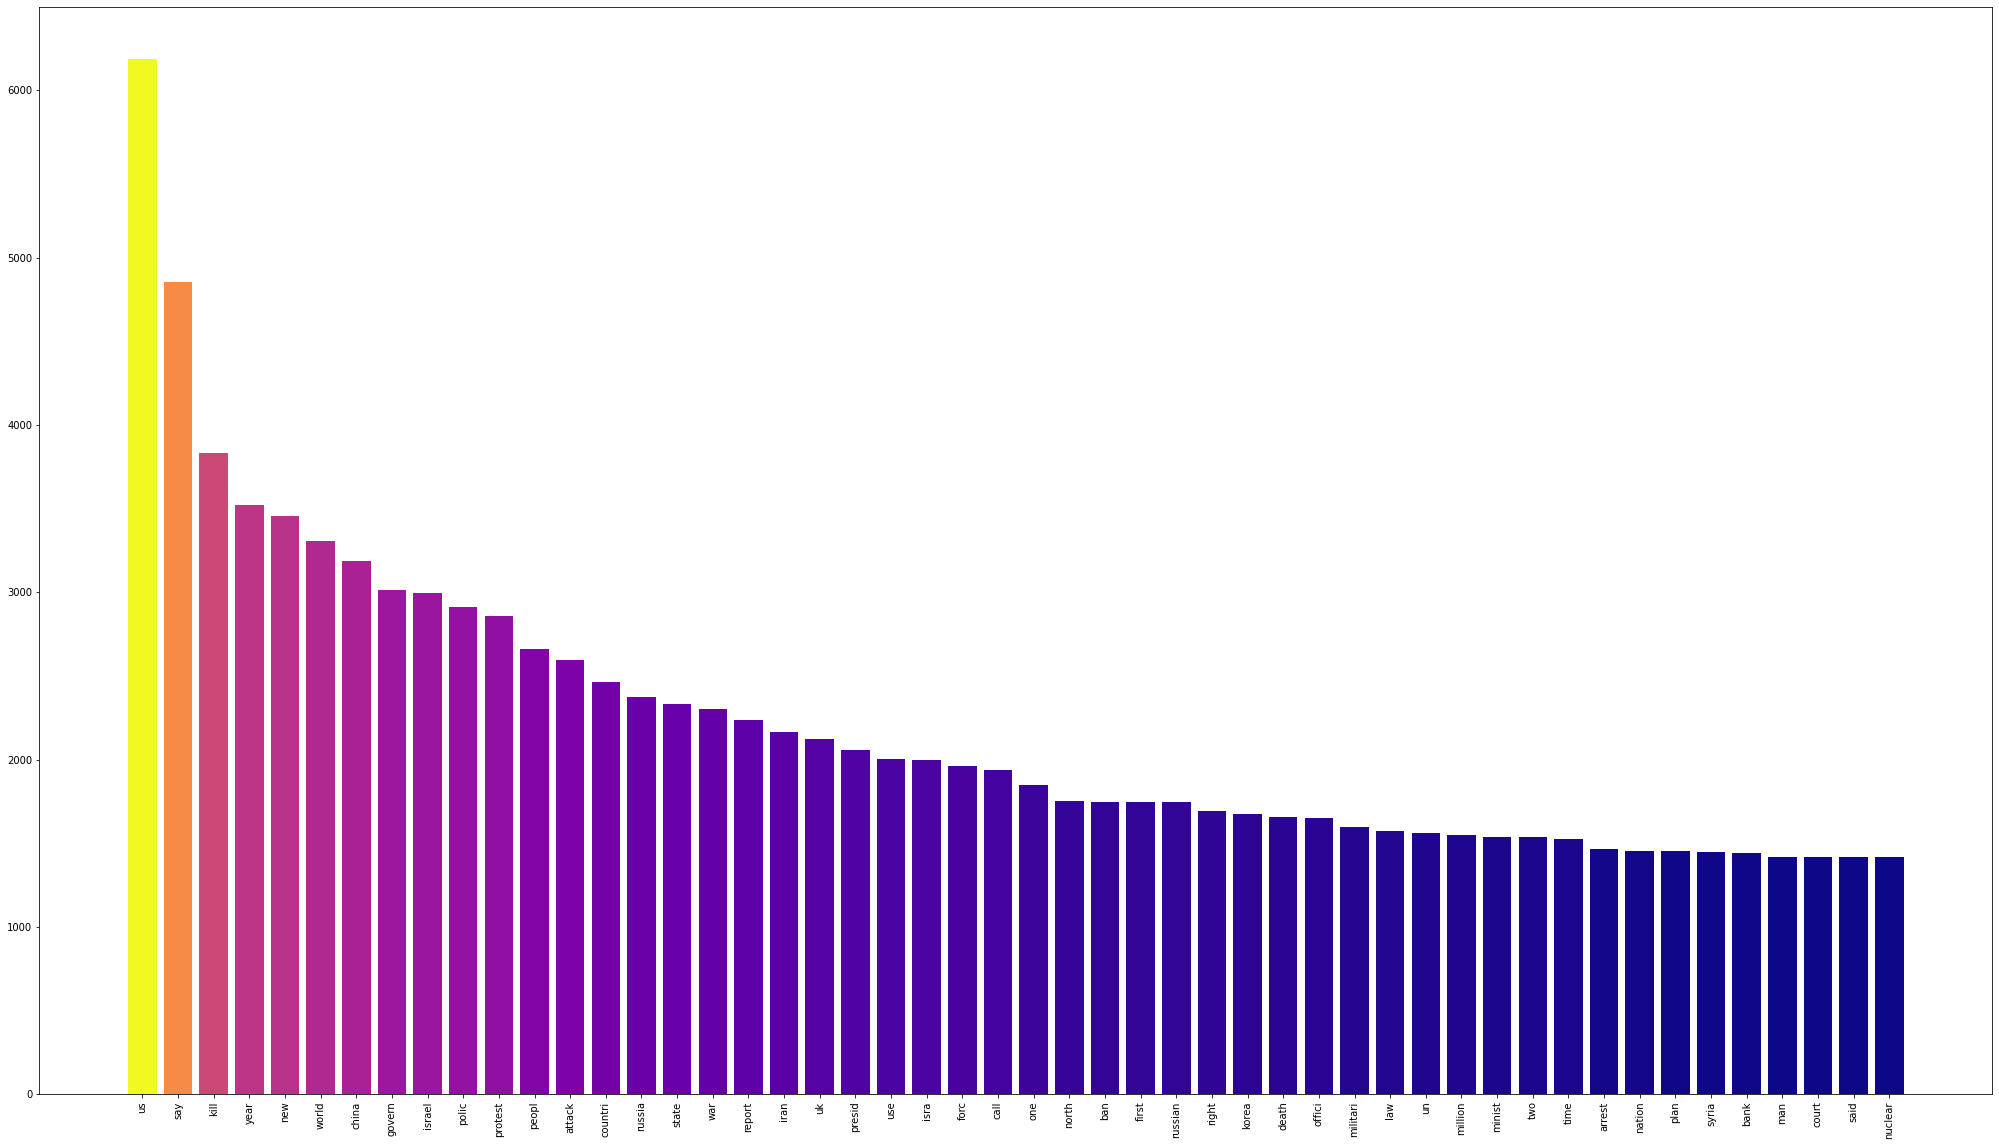

In [0]:
import heapq
import numpy as np

# Sort the words
h = []
for k, v in word_freq.items():
    heapq.heappush(h, (-v, k))

# Pop from heap into list for pyplot
w, f = [], []
for i in range(50):
    k, v = heapq.heappop(h)
    w.append(v)
    f.append(-k)
    i += 1
    
# We'll need this for later
global_top_words_list = w.copy()
global_top_words_freq = f.copy()

# Plot
plt.figure(figsize=(35,20))
plt.bar(w, f, color = get_colormap("plasma", np.asarray(f)))
plt.xticks(rotation="vertical")
plt.show()###C###

A couple of observations can be made here:

1. First, the top word is "us". Assuming it does not represent the pronoun "us", it is probably related to the USA. This is understandable as DJIA is an equity index of prominent US companies.

2. We can also notice "govern", "presid", "law", "plan", etc. These words may be found in headlines describing government-related matters.

3. "china", "war", "israel", "attack", "force", "iran" are also prominent in frequency. We can conclude that foreign policy and/or global conflicts are  often discussed in the context of stock markets.

We can further visualize the data by looking at word word clouds. Let's create a word cloud for a specific time period. This will help us understand if any particular words are linked to trends:

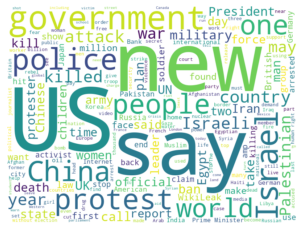

In [0]:
import datetime
import wordcloud
from nltk.corpus import stopwords
import re

# Configurable
start = datetime.datetime(2010, 1, 1)
end   = datetime.datetime(2012, 1, 1)

# Select date range and group all rows, aggregate by concatenating
dfTemp = dfNews.select("Date", "News") \
    .filter(dfNews["Date"] >= start) \
    .filter(dfNews["Date"] <= end) \
    .agg(F.concat_ws("[STOP]", F.collect_list(dfNews["News"])).alias("Concat"))

# Clean up from bad chars
stopwords_eng = set(stopwords.words("english"))
t = re.sub(r"(\[STOP\]b)", "", dfTemp.head(1)[0]["Concat"][1:])
t = re.sub(r"[^a-zA-Z0-9\s]", "", t)
t = re.sub(r"\s+.\s+", " ", t) # remove 1-char words
t = t.split(" ")
t = " ".join([x for x in t if not (x in stopwords_eng)])

# Generate word cloud and plot
wc = wordcloud.WordCloud(
    background_color = "white",
    max_words = 200,
    width = 800,
    height = 600
).generate(t)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()###C###

Next, we can also analyze the length of headlines by period. This may provide insights for further analysis, especially when looking at major events. We'll use an aggregate statistic for faster loading.

In [0]:
period = "7 days"

dfTemp = dfNews.select("Date", "News") \
    .withColumn("Length", udf((lambda s: len(s)), T.IntegerType())(dfNews["News"])) \
    .drop("News")

dfTemp = dfTemp.groupBy(F.window("Date", period).alias("Period")) \
    .agg(F.mean("Length").alias("Mean Headline Length")) \
    .orderBy("Period")
dfTemp = dfTemp.withColumn("Period", dfTemp["Period"]["start"].cast(T.DateType()))
display(dfTemp)###C###

Period,Mean Headline Length
2008-06-05,81.14
2008-06-12,83.75428571428571
2008-06-19,84.65142857142857
2008-06-26,85.96571428571428
2008-07-03,72.66285714285715
2008-07-10,69.17714285714285
2008-07-17,78.62857142857143
2008-07-24,76.48571428571428
2008-07-31,73.96
2008-08-07,78.49142857142857


Output can only be rendered in Databricks

This doesn't give us much insight, as headlines seem to be hovering 70-130 characters consistently. This could indicate a limitation on the platform itself (some "subreddits" may limit their users' post title length, and this may be the limiting factor.)

What about the emotions in headlines? Let's query a portion of our dataset&mdash;say, the 2008 financial crisis&mdash;and analyze the emotions behind headlines in this period.

In [0]:
import datetime
import wordcloud
from nltk.corpus import stopwords
import re

# Configurable
start = datetime.datetime(2008, 8, 8)
end   = datetime.datetime(2009, 8, 8)

# Select date range and group all rows, aggregate by concatenating
dfTemp = dfNews.select("Date", "Neutrality", "Emotion") \
    .filter(dfNews["Date"] >= start) \
    .filter(dfNews["Date"] <= end) \
    .filter(dfNews["Emotion"] != "Unknown") \
    .join(dfDjia, "Date", "full")
dfTemp = dfTemp.withColumn("% Change", (
    (dfTemp["Close"] - F.lag("Close", 1).over(Window.partitionBy().orderBy("Date"))) / (
    F.lag("Close", 1).over(Window.partitionBy().orderBy("Date")
))))
dfTemp = dfTemp.na.drop("any")
dfTemp = dfTemp.withColumn("Positive Opinion", F.udf((lambda x: x if x >= 0.05 else 0), T.DoubleType())(dfTemp["Neutrality"]))
dfTemp = dfTemp.withColumn("Neutral Opinion", F.udf((lambda x: abs(x) if x > -0.05 and x < 0.05 else 0), T.DoubleType())(dfTemp["Neutrality"]))
dfTemp = dfTemp.withColumn("Negative Opinion", F.udf((lambda x: abs(x) if x <= -0.05 else 0), T.DoubleType())(dfTemp["Neutrality"]))
dfTemp = dfTemp.orderBy("Date")

display(dfTemp)###C###

Date,Neutrality,Emotion,Open,High,Low,Close,Volume,Adj Close,Change,SMA5,SMA14,SMA30,id,OBV,Increase,Change 1D,Change 5D,Change 14D,Change 30D,% Change,Positive Opinion,Neutral Opinion,Negative Opinion
2008-08-08,-0.3818,Negative,11432.089844,11759.959961,11388.040039,11734.320312,2.1283E8,11734.320312,302.23046799999975,11734.320312,11734.320312,11734.320312,0,0.0,1,1,1,1,1,0.0,null,null,0.3818
2008-08-08,-0.7096,Negative,11432.089844,11759.959961,11388.040039,11734.320312,2.1283E8,11734.320312,302.23046799999975,11734.320312,11734.320312,11734.320312,0,0.0,1,1,1,1,1,0.0,null,null,0.7096
2008-08-08,-0.6908,Negative,11432.089844,11759.959961,11388.040039,11734.320312,2.1283E8,11734.320312,302.23046799999975,11734.320312,11734.320312,11734.320312,0,0.0,1,1,1,1,1,0.0,null,null,0.6908
2008-08-08,-0.34,Negative,11432.089844,11759.959961,11388.040039,11734.320312,2.1283E8,11734.320312,302.23046799999975,11734.320312,11734.320312,11734.320312,0,0.0,1,1,1,1,1,0.0,null,null,0.34
2008-08-08,-0.34,Negative,11432.089844,11759.959961,11388.040039,11734.320312,2.1283E8,11734.320312,302.23046799999975,11734.320312,11734.320312,11734.320312,0,0.0,1,1,1,1,1,0.0,null,null,0.34
2008-08-08,-0.5994,Negative,11432.089844,11759.959961,11388.040039,11734.320312,2.1283E8,11734.320312,302.23046799999975,11734.320312,11734.320312,11734.320312,0,0.0,1,1,1,1,1,0.0,null,null,0.5994
2008-08-08,-0.5994,Negative,11432.089844,11759.959961,11388.040039,11734.320312,2.1283E8,11734.320312,302.23046799999975,11734.320312,11734.320312,11734.320312,0,0.0,1,1,1,1,1,0.0,null,null,0.5994
2008-08-08,-0.4767,Negative,11432.089844,11759.959961,11388.040039,11734.320312,2.1283E8,11734.320312,302.23046799999975,11734.320312,11734.320312,11734.320312,0,0.0,1,1,1,1,1,0.0,null,null,0.4767
2008-08-08,-0.2263,Negative,11432.089844,11759.959961,11388.040039,11734.320312,2.1283E8,11734.320312,302.23046799999975,11734.320312,11734.320312,11734.320312,0,0.0,1,1,1,1,1,0.0,null,null,0.2263
2008-08-08,-0.765,Negative,11432.089844,11759.959961,11388.040039,11734.320312,2.1283E8,11734.320312,302.23046799999975,11734.320312,11734.320312,11734.320312,0,0.0,1,1,1,1,1,0.0,null,null,0.765


Output can only be rendered in Databricks

Now, let's take a look at a bull period and see the sentiment:

In [0]:
import datetime
import wordcloud
from nltk.corpus import stopwords
import re

# Configurable
start = datetime.datetime(2012, 10, 1)
end   = datetime.datetime(2013, 10, 1)

# Select date range and join with DJIA
dfTemp = dfNews.select("Date", "Neutrality", "Emotion") \
    .filter(dfNews["Date"] >= start) \
    .filter(dfNews["Date"] <= end) \
    .filter(dfNews["Emotion"] != "Unknown") \
    .join(dfDjia, "Date", "full")

# Change from last day to today as %
dfTemp = dfTemp.withColumn("% Change", (
    (dfTemp["Close"] - F.lag("Close", 1).over(Window.partitionBy().orderBy("Date"))) / (
    F.lag("Close", 1).over(Window.partitionBy().orderBy("Date")
))))

# For analysis purposes
dfTemp = dfTemp.na.drop("any")

# Distinct cols for positive and negative opinion
dfTemp = dfTemp.withColumn("Positive Opinion", F.udf((lambda x: x if x >= 0.05 else 0), T.DoubleType())(dfTemp["Neutrality"]))
dfTemp = dfTemp.withColumn("Neutral Opinion", F.udf((lambda x: abs(x) if x > -0.05 and x < 0.05 else 0), T.DoubleType())(dfTemp["Neutrality"]))
dfTemp = dfTemp.withColumn("Negative Opinion", F.udf((lambda x: abs(x) if x <= -0.05 else 0), T.DoubleType())(dfTemp["Neutrality"]))
dfTemp = dfTemp.orderBy("Date")

display(dfTemp)###C###

Date,Neutrality,Emotion,Open,High,Low,Close,Volume,Adj Close,Change,SMA5,SMA14,SMA30,id,OBV,Increase,Change 1D,Change 5D,Change 14D,Change 30D,% Change,Positive Opinion,Neutral Opinion,Negative Opinion
2012-10-01,-0.3818,Negative,13437.660156,13598.25,13437.660156,13515.110352,1.0612E8,13515.110352,77.45019599999978,13461.8539066,13514.776297571427,13325.222623799997,1045,8.31642E9,1,1,0,1,1,0.00580335753832797,null,null,0.3818
2012-10-01,-0.1027,Negative,13437.660156,13598.25,13437.660156,13515.110352,1.0612E8,13515.110352,77.45019599999978,13461.8539066,13514.776297571427,13325.222623799997,1045,8.31642E9,1,1,0,1,1,0.0,null,null,0.1027
2012-10-01,0.4767,Positive,13437.660156,13598.25,13437.660156,13515.110352,1.0612E8,13515.110352,77.45019599999978,13461.8539066,13514.776297571427,13325.222623799997,1045,8.31642E9,1,1,0,1,1,0.0,0.4767,null,null
2012-10-01,-0.4019,Negative,13437.660156,13598.25,13437.660156,13515.110352,1.0612E8,13515.110352,77.45019599999978,13461.8539066,13514.776297571427,13325.222623799997,1045,8.31642E9,1,1,0,1,1,0.0,null,null,0.4019
2012-10-01,-0.8176,Negative,13437.660156,13598.25,13437.660156,13515.110352,1.0612E8,13515.110352,77.45019599999978,13461.8539066,13514.776297571427,13325.222623799997,1045,8.31642E9,1,1,0,1,1,0.0,null,null,0.8176
2012-10-01,-0.8126,Negative,13437.660156,13598.25,13437.660156,13515.110352,1.0612E8,13515.110352,77.45019599999978,13461.8539066,13514.776297571427,13325.222623799997,1045,8.31642E9,1,1,0,1,1,0.0,null,null,0.8126
2012-10-01,0.4215,Positive,13437.660156,13598.25,13437.660156,13515.110352,1.0612E8,13515.110352,77.45019599999978,13461.8539066,13514.776297571427,13325.222623799997,1045,8.31642E9,1,1,0,1,1,0.0,0.4215,null,null
2012-10-01,-0.3182,Negative,13437.660156,13598.25,13437.660156,13515.110352,1.0612E8,13515.110352,77.45019599999978,13461.8539066,13514.776297571427,13325.222623799997,1045,8.31642E9,1,1,0,1,1,0.0,null,null,0.3182
2012-10-01,0.4215,Positive,13437.660156,13598.25,13437.660156,13515.110352,1.0612E8,13515.110352,77.45019599999978,13461.8539066,13514.776297571427,13325.222623799997,1045,8.31642E9,1,1,0,1,1,0.0,0.4215,null,null
2012-10-01,-0.9393,Negative,13437.660156,13598.25,13437.660156,13515.110352,1.0612E8,13515.110352,77.45019599999978,13461.8539066,13514.776297571427,13325.222623799997,1045,8.31642E9,1,1,0,1,1,0.0,null,null,0.9393


Output can only be rendered in Databricks

We find that another period, even though it has resulted in an overall positive performance, has seen overwhelmingly negative headlines. There could be multiple causes for this:

1. Our NLP algorithm does not have enough information to make the right conclusion, leading to skewed results. This is the most likely result.

2. Market sentiment on Reddit is more inclined to be negative than positive.

Now that we've done an initial analysis of our datasets and have a better understanding of what's going on, let's try to infer a couple of hypotheses and validate/disprove them through our data.

## Part 3

The third part of this notebook is available here:

**[Daily News & Stock Market Correlation-Prediction (3-4)](https://databricks-prod-cloudfront.cloud.databricks.com/public/4027ec902e239c93eaaa8714f173bcfc/1993205155917960/4235175522480070/6079964132923530/latest.html)**